In [1]:
# we consider a least square problem, f(x) = (Ax-b)^2
import numpy as np
import numpy.linalg as la
from scipy.stats import ortho_group
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm
from math import sqrt


import warnings
warnings.filterwarnings("error")

In [2]:
np.random.seed(seed=42)
agent_num = 10

d=1000
data_num = 200
x_opt = np.random.rand(d)
x_local_opt = np.tile(x_opt,(agent_num, 1))
x_local_opt = x_local_opt+ 0.1* np.random.rand(agent_num, d)
# print(x_local_opt[:,0])
# P = ortho_group.rvs(d)
A = np.zeros((agent_num, data_num, d))
b = np.zeros((agent_num, data_num))

for i in range(agent_num):
    P = ortho_group.rvs(d)
    eigv = (np.random.rand(d))
    eigv[0:50] = np.zeros(50)
    A_temp = np.matmul( np.diag(eigv), P)
    A[i] = A_temp[0:data_num,:]
# A = np.matmul(np.transpose(P), np.matmul( np.diag(eigv), P))
# x_opt = np.random.rand(d)
    b[i] = np.matmul( A[i], x_local_opt[i])
    
    
# filename = "d_1000_n_10"
# np.save(filename+"_A", A)
# np.save(filename+"_b", b)
# np.save(filename+"_x", x_opt)
print(np.linalg.matrix_rank(np.matmul(np.transpose(A[1]), A[1])))


150


In [3]:
# gamma = np.load("gamma.npy")

# # we first try to calculate the real optimal x_star
A_stack = np.reshape(A, (2000,1000))
b_stack = np.reshape(b, (2000))

pinv_A = np.linalg.pinv(A_stack)
x_direct = np.matmul(pinv_A, b_stack)
print(x_direct[0])
error = np.matmul(A_stack, x_direct)-b_stack
loss_star = np.matmul(np.transpose(error), error)


0.4728918018918043


In [4]:
agent_num = 10
rho = 1
P = np.zeros((10,10))
beta = 0.1

for i in range(10):
    for j in range(10):
        if i == j:
            P[i,j] = 1 - beta
        if np.abs(i-j) == 1:
#         if np.abs(i-j) == 1 or np.abs(i-j) == 2:
            P[i, j] = beta/2
        if (10 - np.abs(i-j)) == 1 :
#         if (10 - np.abs(i-j)) == 1 or (10 - np.abs(i-j)) == 2:
            P[i, j] = beta/2
            

print(P)
P_tilde = (P+np.eye(agent_num))/2
# print(P_tilde)
# x_0 = np.random.rand( d)
x_0 = np.random.rand(agent_num, d)

print(np.linalg.matrix_rank(P))
ev = la.eigvals(P)
print(ev)

[[0.9  0.05 0.   0.   0.   0.   0.   0.   0.   0.05]
 [0.05 0.9  0.05 0.   0.   0.   0.   0.   0.   0.  ]
 [0.   0.05 0.9  0.05 0.   0.   0.   0.   0.   0.  ]
 [0.   0.   0.05 0.9  0.05 0.   0.   0.   0.   0.  ]
 [0.   0.   0.   0.05 0.9  0.05 0.   0.   0.   0.  ]
 [0.   0.   0.   0.   0.05 0.9  0.05 0.   0.   0.  ]
 [0.   0.   0.   0.   0.   0.05 0.9  0.05 0.   0.  ]
 [0.   0.   0.   0.   0.   0.   0.05 0.9  0.05 0.  ]
 [0.   0.   0.   0.   0.   0.   0.   0.05 0.9  0.05]
 [0.05 0.   0.   0.   0.   0.   0.   0.   0.05 0.9 ]]
10
[0.8       0.8190983 0.8690983 0.9309017 1.        0.9809017 0.9809017
 0.9309017 0.8190983 0.8690983]


In [40]:
#first is gradient Descent
iter_num = 5000000
lr = 0.1
time_int = 0.1

x_k = np.zeros((agent_num,d))
x_k1 = np.zeros((agent_num,d))
# x_k2 = np.zeros((agent_num,d))
y_k = np.zeros((agent_num,d))
y_k1 = np.zeros((agent_num,d))
# y_k2 = np.zeros((agent_num,d))
# x_accumulate = np.zeros((agent_num,d))
# y_accumulate = np.zeros((agent_num,d))


z = np.zeros(d)
loss_z = np.zeros((iter_num))
loss_x_global = np.zeros((agent_num, iter_num))
# accu_x_record = np.zeros((iter_num))
# accu_y_record = np.zeros((iter_num))
x_record = np.zeros((iter_num))
loss = np.zeros((agent_num, iter_num))

z = np.mean(x_0, axis = 0)
# for i in  range(agent_num):

#     x_k[i] = np.copy(x_0)
x_k = np.copy(x_0)
# y_k = np.zeros(np.shape(x_0))
# y_k = x_0
# Calculate the first step as normal gradient
# for i in  range(agent_num):
#     local_x_average = np.matmul(np.expand_dims(P[i,:], axis=0), x_k ) 
#     gradient = np.matmul(np.transpose(A[i]), (np.matmul(A[i], x_k[i,:])-b[i]))
#     x_k1[i] = local_x_average - lr * gradient
#     loss[i,0] = la.norm(np.matmul(A[i], x_k[i,:])-b[i])*la.norm(np.matmul(A[i], x_k[i,:])-b[i])
# # y_k1 = np.copy(x_k1)
# # y_k = np.copy(x_k)

for k in tqdm(range( iter_num)):
    for i in range(agent_num):

        gradient_k1 = np.matmul(np.transpose(A[i]), (np.matmul(A[i], x_k[i,:])-b[i]))
        y_k1[i,:] = y_k[i,:] + time_int*(x_k[(i+1)%agent_num,:]+x_k[(i-1)%agent_num,:] - 2*x_k[i,:])
        x_k1[i,:] = x_k[i,:] - time_int*(lr*gradient_k1 - y_k[i,:] - (x_k[(i+1)%agent_num,:]+x_k[(i-1)%agent_num,:] - 2*x_k[i,:]))


        error = np.matmul(A[i], x_k1[i,:])-b[i]
        loss[i, k] = np.matmul(np.transpose(error), error)
    x_k = np.copy(x_k1)
#     x_k1 = np.copy(x_k2)
    y_k = np.copy(y_k1)
#     y_k1 = np.copy(y_k2)

    z = np.mean(x_k, axis = 0)
#     print(z[0])
#     for i in range(agent_num):
    error = np.matmul(A_stack, z)-b_stack
    loss_z[k] = np.matmul(np.transpose(error), error)
    x_record[k] = x_k[0,0]-x_direct[0]
    for i in range(agent_num):
        error = np.matmul(A_stack, x_k[i,:])-b_stack
        loss_x_global[i,k] = np.matmul(np.transpose(error), error)

    

Text(0.5, 0, 'x_accu value')

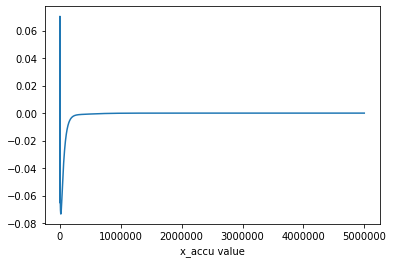

In [41]:
plt.plot(x_record)
# plt.scatter(accu_x_record[1:])
# plt.plot(gamma[1:20000])
y_range = 1e2
# plt.ylim((-y_range,y_range))
# print(accu_x_record[-1])
plt.xlabel("x_accu value")
# plt.savefig("non_accel_EXTRA x_accu 5m_it over_k")
# print(gamma[100000])

-33451329624.651375


Text(0.5, 0, 'local x value')

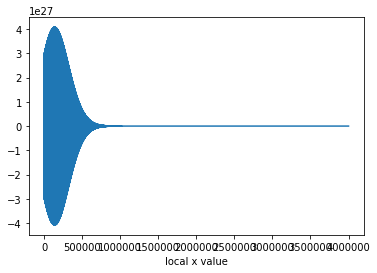

In [44]:
# plt.plot(x_record[1000000:])
# plt.plot(gamma[1:20000])
# plt.ylim((-5e10,5000000))
print(x_record[-1])
plt.xlabel("local x value")

# plt.savefig("non_accel_EXTRA x_record 5m_it over_k")

In [1]:
# loss_z_k2 = (loss_z-loss_star)*range(iter_num)*range(iter_num)
# loss_z_k1 = (loss_z-loss_star)*range(iter_num)
plt.plot(loss_x_global[:20000])
# plt.ylim((-0.01,0.5))
# print(loss_z_k2[1:].min())
# print((loss_z*range(iter_num))[-1])
# plt.xlabel("(loss-loss*)xk^2")
# plt.savefig("non_accel_EXTRA (loss-loss_star)k 5m_it over_k")

# plt.savefig("EXTRA(loss-loss_star)k^2")

NameError: name 'plt' is not defined

-1.1796119636642288e-16


Text(0.5, 15.0, '(loss-loss*)xk^2')

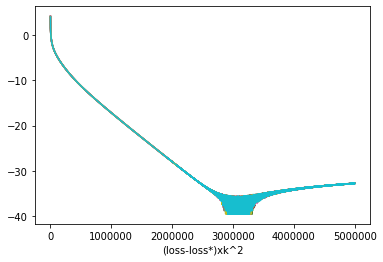

In [48]:
for i in range(agent_num):
    
#     loss_x_k2 = (loss_x_global[i,:]-loss_star)*range(iter_num)*range(iter_num)
    loss_x_k2 = (loss_x_global[i,:]-loss_star)
#     loss_x_k2 = (loss_x_global[i,:])*range(iter_num)*range(iter_num)
#     loss_x_k2 = (loss_x_global[i,:]-loss_star)*range(iter_num)
    plt.plot(np.log(loss_x_k2[1:]))
# loss_x2_k2 = (loss[1,:]-loss_star)*range(iter_num)*range(iter_num)
plt.savefig("log(local_loss-loss_star)")

# plt.plot(loss_x2_k2[1:])
# plt.ylim((0,1))
print(loss_x_k2[1:].min())
# print(loss_z*range(30000)[-1])
plt.xlabel("(loss-loss*)xk^2")


In [6]:
print(-1 % 10)

9
